<a href="https://colab.research.google.com/github/oztuka/IS584CourseTermProject/blob/main/notebooks/EDA_and_Quality_Checks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 584: Deep Learning for Text Analytics

# Term Project

**EDA and Quality Checks**

**Özkan Tuğberk Kartal**

**2481117**

The following codes are written regarding EDA and Quality Checks:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gdown
import zipfile
import os
from pathlib import Path
import re
import json
import shutil

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(r'(\d+)', s)]

def get_pandas_data_from(filenames):
  data_list = []
  for filename in filenames:
    try:
      with open(filename, 'r') as file:
        # json_normalize is used to flatten the nested dicts
        # this will increase the number of total columns of data
        data_list.append(pd.json_normalize(json.load(file)))
    except: # ignore erroneous json file data
      pass
  return pd.concat(data_list, ignore_index=True)

print("pandas.__version__: " + pd.__version__)
print("gdown.__version__: " + gdown.__version__)
print("re.__version__: " + re.__version__)
print("json.__version__: " + json.__version__)

data_zip_download_file_url = f"https://drive.google.com/uc?export=download&id=1nJdljy468roUcKLbVwWUhMs7teirah75"

output_zip_file_name = "dataset.zip"

gdown.download(data_zip_download_file_url, output_zip_file_name, quiet = False)

# extract ZIP file
with zipfile.ZipFile(output_zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("dataset")

pandas.__version__: 2.2.2
gdown.__version__: 5.2.0
re.__version__: 2.2.1
json.__version__: 2.0.9


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1nJdljy468roUcKLbVwWUhMs7teirah75
From (redirected): https://drive.google.com/uc?export=download&id=1nJdljy468roUcKLbVwWUhMs7teirah75&confirm=t&uuid=796ab505-e276-4c1a-bc6f-02b447149c96
To: /content/dataset.zip
100%|██████████| 235M/235M [00:05<00:00, 46.7MB/s]


In [2]:
# get root_folder
root_folder = Path("dataset/dataset")

ICLR_content_files = []
ICLR_paper_files = []
ICLR_review_files = []
NIPS_content_files = []
NIPS_paper_files = []
NIPS_review_files = []

# Iterate over all subdirectories and files
for file in root_folder.rglob('*content.json'):
    # Check if the word "ICLR" is in the file name
    if 'ICLR' in file.name:
        ICLR_content_files.append(str(file.parent) + "/" + file.name)
    elif 'NIPS' in file.name:
        NIPS_content_files.append(str(file.parent) + "/" + file.name)
for file in root_folder.rglob('*paper.json'):
    # Check if the word "ICLR" is in the file name
    if 'ICLR' in file.name:
        ICLR_paper_files.append(str(file.parent) + "/" + file.name)
    elif 'NIPS' in file.name:
        NIPS_paper_files.append(str(file.parent) + "/" + file.name)
for file in root_folder.rglob('*review.json'):
    # Check if the word "ICLR" is in the file name
    if 'ICLR' in file.name:
        ICLR_review_files.append(str(file.parent) + "/" + file.name)
    elif 'NIPS' in file.name:
        NIPS_review_files.append(str(file.parent) + "/" + file.name)

ICLR_content_files = sorted(ICLR_content_files, key = natural_sort_key)
ICLR_paper_files = sorted(ICLR_paper_files, key = natural_sort_key)
ICLR_review_files = sorted(ICLR_review_files, key = natural_sort_key)
NIPS_content_files = sorted(NIPS_content_files, key = natural_sort_key)
NIPS_paper_files = sorted(NIPS_paper_files, key = natural_sort_key)
NIPS_review_files = sorted(NIPS_review_files, key = natural_sort_key)

ICLR_content_data = get_pandas_data_from(ICLR_content_files)
ICLR_paper_data = get_pandas_data_from(ICLR_paper_files)
ICLR_review_data = get_pandas_data_from(ICLR_review_files)
NIPS_content_data = get_pandas_data_from(NIPS_content_files)
NIPS_paper_data = get_pandas_data_from(NIPS_paper_files)
NIPS_review_data = get_pandas_data_from(NIPS_review_files)

# basing upon id of the items, merge each ICLR and NIPS data into one by replacing
# missing column values with NaN by using 'how' = 'outer'
ICLR_data = pd.merge(pd.merge(ICLR_content_data, ICLR_paper_data, on='id', how='outer'), ICLR_review_data, on='id', how='outer')
NIPS_data = pd.merge(pd.merge(NIPS_content_data, NIPS_paper_data, on='id', how='outer'), NIPS_review_data, on='id', how='outer')

# concatenate ICLR_data and NIPS_data
data = pd.concat([ICLR_data, NIPS_data], ignore_index=True)

# ICLR_data, NIPS_data and data can be processed in the future

print("ICLR_content_files count: " + str(len(ICLR_content_files)))
print("ICLR_content_data.shape: " + str(ICLR_content_data.shape))
print("ICLR_content_data.columns: " + str(ICLR_content_data.columns))
print(" ")
print("ICLR_paper_files count: " + str(len(ICLR_paper_files)))
print("ICLR_paper_data.shape: " + str(ICLR_paper_data.shape))
print("ICLR_paper_data.columns: " + str(ICLR_paper_data.columns))
print(" ")
print("ICLR_review_files count: " + str(len(ICLR_review_files)))
print("ICLR_review_data.shape: " + str(ICLR_review_data.shape))
print("ICLR_review_data.columns: " + str(ICLR_review_data.columns))
print(" ")
print("ICLR_data.shape: " + str(ICLR_data.shape))
print("ICLR_data.columns: " + str(ICLR_data.columns))
print(" ")
print(" ")

print("NIPS_content_files count: " + str(len(NIPS_content_files)))
print("NIPS_content_data.shape: " + str(NIPS_content_data.shape))
print("NIPS_content_data.columns: " + str(NIPS_content_data.columns))
print(" ")
print("NIPS_paper_files count: " + str(len(NIPS_paper_files)))
print("NIPS_paper_data.shape: " + str(NIPS_paper_data.shape))
print("NIPS_paper_data.columns: " + str(NIPS_paper_data.columns))
print(" ")
print("NIPS_review_files count: " + str(len(NIPS_review_files)))
print("NIPS_review_data.shape: " + str(NIPS_review_data.shape))
print("NIPS_review_data.columns: " + str(NIPS_review_data.columns))
print(" ")
print("NIPS_data.shape: " + str(NIPS_data.shape))
print("NIPS_data.columns: " + str(NIPS_data.columns))
print(" ")
print(" ")

print("data.shape: " + str(data.shape))
print("data.columns: " + str(data.columns))
print(" ")
print(" ")


ICLR_content_files count: 5171
ICLR_content_data.shape: (5171, 12)
ICLR_content_data.columns: Index(['name', 'id', 'metadata.source', 'metadata.title', 'metadata.authors',
       'metadata.emails', 'metadata.sections', 'metadata.references',
       'metadata.referenceMentions', 'metadata.year', 'metadata.abstractText',
       'metadata.creator'],
      dtype='object')
 
ICLR_paper_files count: 5192
ICLR_paper_data.shape: (5192, 8)
ICLR_paper_data.columns: Index(['id', 'conference', 'decision', 'url', 'hasContent', 'hasReview',
       'title', 'authors'],
      dtype='object')
 
ICLR_review_files count: 5178
ICLR_review_data.shape: (5178, 3)
ICLR_review_data.columns: Index(['id', 'reviews', 'metaReview'], dtype='object')
 
ICLR_data.shape: (5194, 21)
ICLR_data.columns: Index(['name', 'id', 'metadata.source', 'metadata.title', 'metadata.authors',
       'metadata.emails', 'metadata.sections', 'metadata.references',
       'metadata.referenceMentions', 'metadata.year', 'metadata.abstractT

ICLR data first ten rows are 
                name             id metadata.source  \
0    ICLR_2017_1.pdf    ICLR_2017_1             CRF   
1   ICLR_2017_10.pdf   ICLR_2017_10             CRF   
2  ICLR_2017_100.pdf  ICLR_2017_100             CRF   
3  ICLR_2017_101.pdf  ICLR_2017_101             CRF   
4  ICLR_2017_102.pdf  ICLR_2017_102             CRF   
5  ICLR_2017_103.pdf  ICLR_2017_103             CRF   
6  ICLR_2017_104.pdf  ICLR_2017_104             CRF   
7  ICLR_2017_105.pdf  ICLR_2017_105             CRF   
8  ICLR_2017_106.pdf  ICLR_2017_106             CRF   
9  ICLR_2017_107.pdf  ICLR_2017_107             CRF   

                                      metadata.title  \
0  MAKING NEURAL PROGRAMMING ARCHITECTURES GENERA...   
1  Q-PROP: SAMPLE-EFFICIENT POLICY GRADIENT WITH ...   
2  INTROSPECTION:ACCELERATING NEURAL NETWORK TRAI...   
3        HYPERBAND: BANDIT-BASED CONFIGURATION EVAL-   
4                  LIE-ACCESS NEURAL TURING MACHINES   
5                    QUASI-R

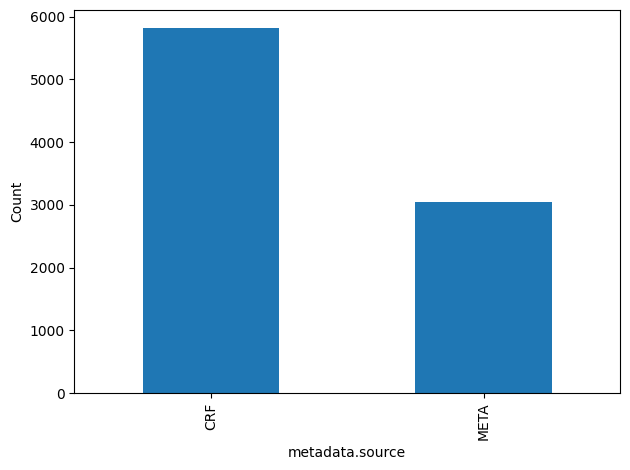

 
 
 
 
 
For the column 'metadata.title', there are 5459 unique values which are given by
['MAKING NEURAL PROGRAMMING ARCHITECTURES GENERALIZE VIA RECURSION'
 'Q-PROP: SAMPLE-EFFICIENT POLICY GRADIENT WITH AN OFF-POLICY CRITIC'
 'INTROSPECTION:ACCELERATING NEURAL NETWORK TRAINING BY LEARNING WEIGHT EVOLUTION'
 ... 'Distributional Reward Decomposition for Reinforcement Learning'
 'Learning to Perform Local Rewriting for Combinatorial Optimization'
 'Bayesian Learning of Sum-Product Networks']
 
 and the following unique values occur more than once
metadata.title
RECURRENT NEURAL NETWORKS                                                           5
DEEP REINFORCEMENT LEARNING                                                         3
CONVOLUTIONAL NEURAL NETWORKS                                                       3
DEEP NEURAL NETWORKS                                                                3
Launch and Iterate: Reducing Prediction Churn                                       2
M

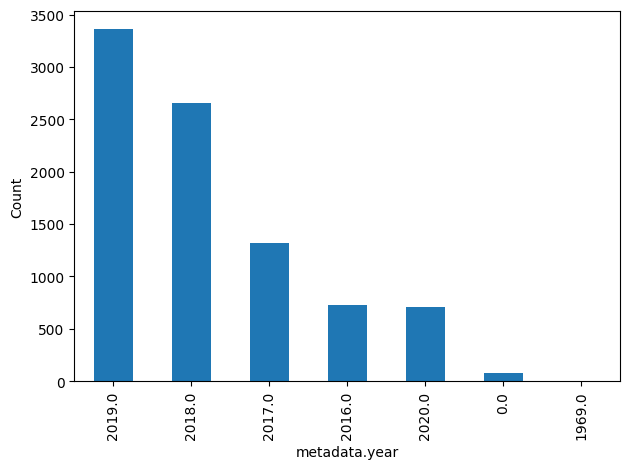

 
 
 
 
 
For the column 'metadata.abstractText', there are 8844 unique values which are given by
['Empirically, neural networks that attempt to learn programs from data have exhibited poor generalizability. Moreover, it has traditionally been difficult to reason about the behavior of these models beyond a certain level of input complexity. In order to address these issues, we propose augmenting neural architectures with a key abstraction: recursion. As an application, we implement recursion in the Neural Programmer-Interpreter framework on four tasks: grade-school addition, bubble sort, topological sort, and quicksort. We demonstrate superior generalizability and interpretability with small amounts of training data. Recursion divides the problem into smaller pieces and drastically reduces the domain of each neural network component, making it tractable to prove guarantees about the overall system’s behavior. Our experience suggests that in order for neural architectures to robustly le

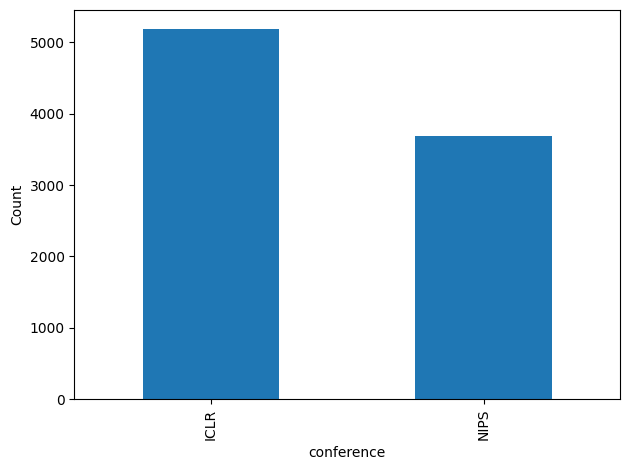

 
 
 
 
 
For the column 'decision', there are 8 unique values which are given by
['Accept (Oral)' 'Accept (Poster)' 'Invite to Workshop Track' 'Reject' nan
 'Accept (Spotlight)' 'Accept (Talk)' 'Accept']
 
 and histogram of this column is given by 


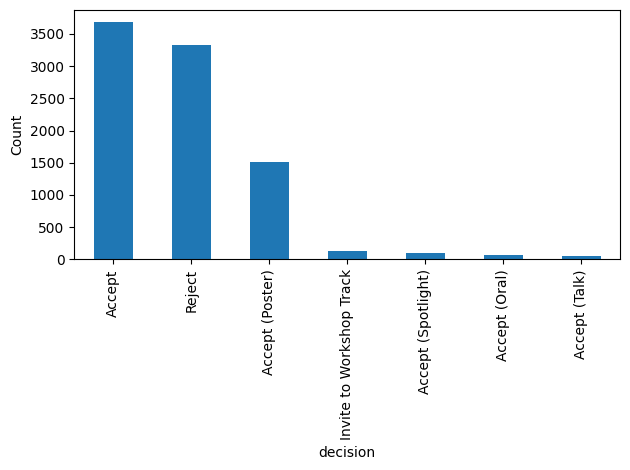

 
 
 
 
 
For the column 'url', there are 8878 unique values which are given by
['http://openreview.net/pdf/342543971002b3e5f08be11d9a6da60b594a6b47.pdf'
 'http://openreview.net/pdf/c210ff1a4868a532ec87ee0da3c6e4254ee567fb.pdf'
 'http://openreview.net/pdf/f5316305b0560db063525a71f36ca95d1932981e.pdf'
 ...
 'http://papers.nips.cc/paper/9291-region-mutual-information-loss-for-semantic-segmentation.pdf'
 'http://papers.nips.cc/paper/9292-learning-stable-deep-dynamics-models.pdf'
 'http://papers.nips.cc/paper/9293-image-captioning-transforming-objects-into-words.pdf']
 
 
 
 
 
For the column 'hasContent', there are 3 unique values which are given by
['true' 'false' nan]
 
 and histogram of this column is given by 


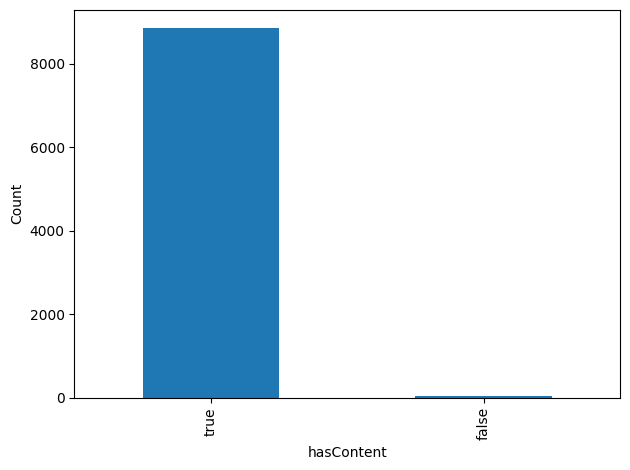

 
 
 
 
 
For the column 'hasReview', there are 3 unique values which are given by
['true' nan 'false']
 
 and histogram of this column is given by 


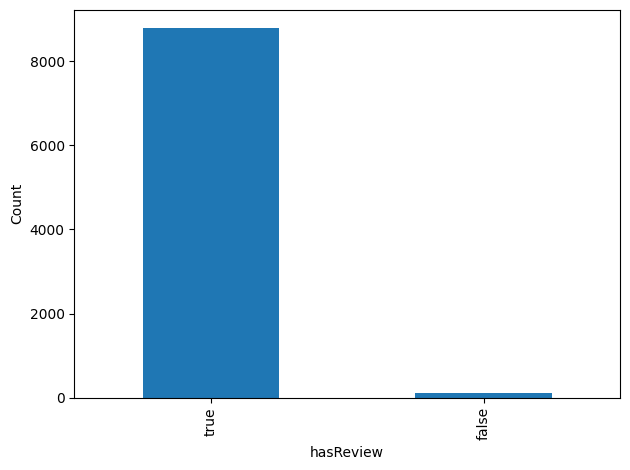

 
 
 
 
 
For the column 'title', there are 8826 unique values which are given by
['Making Neural Programming Architectures Generalize via Recursion'
 'Q-Prop: Sample-Efficient Policy Gradient with An Off-Policy Critic'
 'Introspection:Accelerating Neural Network Training By Learning Weight Evolution'
 ... 'Region Mutual Information Loss for Semantic Segmentation'
 'Learning Stable Deep Dynamics Models'
 'Image Captioning: Transforming Objects into Words']
 
 and the following unique values occur more than once
title
NA                                                                                  6
N/A                                                                                 3
Visualizing the Loss Landscape of Neural Nets                                       2
Prototypical Networks for Few-shot Learning                                         2
#Exploration: A Study of Count-Based Exploration for Deep Reinforcement Learning    2
Double Neural Counterfactual Regret Minimizatio

<ipython-input-7-0a65d5303201>:68: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ICLR_data_serialized = ICLR_data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)
<ipython-input-7-0a65d5303201>:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  NIPS_data_serialized = NIPS_data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)
<ipython-input-7-0a65d5303201>:72: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_serialized = data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)
<ipython-input-7-0a65d5303201>:83: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ICLR_data_clean = ICLR_data_serialized.applymap(remove_illegal_chars)
<ipython-input-7-0a65d5303201>:84: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  NIPS_data_clean = NIPS_data_se

In [7]:
print("ICLR data first ten rows are ")
print(ICLR_data.head(10))
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")

print("NIPS data first ten rows are ")
print(NIPS_data.head(10))
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")

os.makedirs('histograms', exist_ok=True)

for col_index in range(len(data.columns)):
  try:
    unique_values_if_applicable = data[data.columns[col_index]].unique()
  except:
    print("For the column '" + str(data.columns[col_index]) + "', data are given in the list format")
    print(" ")
    print(" ")
    print(" ")
    print(" ")
    print(" ")
    continue
  print("For the column '" + str(data.columns[col_index]) + "', there are " + str(len(unique_values_if_applicable))+ " unique values which are given by")
  print(unique_values_if_applicable)
  value_counts = data[data.columns[col_index]].value_counts()
  occuring_more_than_once = value_counts[value_counts > 1]
  if len(unique_values_if_applicable) < 50:
    print(" ")
    print(" and histogram of this column is given by ")
    ax = value_counts.plot(kind='bar', xlabel=str(data.columns[col_index]), ylabel='Count', rot=90)
    plt.tight_layout()
    fig = ax.get_figure()
    fig.savefig('histograms/' + str(data.columns[col_index]).replace(".", "_") + '_histogram.eps', format='eps', dpi=300)
    fig.savefig('histograms/' + str(data.columns[col_index]).replace(".", "_") + '_histogram.jpeg', format='jpeg', dpi=300)
    fig.savefig('histograms/' + str(data.columns[col_index]).replace(".", "_") + '_histogram.svg', format='svg', dpi=300)
    plt.show()
  elif len(occuring_more_than_once) > 0:
    print(" ")
    print(" and the following unique values occur more than once")
    print(occuring_more_than_once)
  print(" ")
  print(" ")
  print(" ")
  print(" ")
  print(" ")

shutil.make_archive('histograms', 'zip', 'histograms')

ICLR_data.to_pickle('ICLR_data.pkl')

NIPS_data.to_pickle('NIPS_data.pkl')

data.to_pickle('all_data.pkl')

ICLR_data.to_csv('ICLR_data.csv')

NIPS_data.to_csv('NIPS_data.csv')

data.to_csv('all_data.csv')

ICLR_data_serialized = ICLR_data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)

NIPS_data_serialized = NIPS_data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)

data_serialized = data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)

ILLEGAL_CHARACTERS_RE = re.compile(r'[\x00-\x1F]')

def remove_illegal_chars(value):
    if isinstance(value, str):
        return ILLEGAL_CHARACTERS_RE.sub('', value)
    else:
        return value

ICLR_data_clean = ICLR_data_serialized.applymap(remove_illegal_chars)
NIPS_data_clean = NIPS_data_serialized.applymap(remove_illegal_chars)
data_clean = data_serialized.applymap(remove_illegal_chars)

ICLR_data_clean.to_excel('ICLR_data.xlsx')

NIPS_data_clean.to_excel('NIPS_data.xlsx')

data_clean.to_excel('all_data.xlsx')


In [17]:
name_unique_values_if_applicable = data["name"].unique()
for val in name_unique_values_if_applicable:
  if "pdf" not in str(val):
    print(val)

nan


In [50]:
metadata_title_unique_values_if_applicable = data["metadata.title"].unique()
nan_count_for_metadata_title = 0
none_count_for_metadata_title = 0
for val in data["metadata.title"]:
  if val is None:
    none_count_for_metadata_title = none_count_for_metadata_title + 1
  if (isinstance(val, float) and val != val):
    nan_count_for_metadata_title = nan_count_for_metadata_title + 1
nan_and_none_count_for_metadata_title = nan_count_for_metadata_title + none_count_for_metadata_title

In [64]:
metadata_year_unique_values_if_applicable = data["metadata.year"].unique()
for index in range(len(data["metadata.year"])):
  val = data["metadata.year"][index]
  if (isinstance(val, float) and val != val) or val == 1969 or val == 0:
    print("id: " + str(data["id"][index]) + ", year: " + str(val))

id: ICLR_2017_240, year: nan
id: ICLR_2017_318, year: nan
id: ICLR_2017_419, year: nan
id: ICLR_2018_487, year: nan
id: ICLR_2018_678, year: nan
id: ICLR_2018_852, year: nan
id: ICLR_2019_1100, year: nan
id: ICLR_2019_1189, year: nan
id: ICLR_2019_1207, year: nan
id: ICLR_2019_1216, year: nan
id: ICLR_2019_1221, year: nan
id: ICLR_2019_1255, year: nan
id: ICLR_2019_1323, year: nan
id: ICLR_2019_1378, year: nan
id: ICLR_2019_1384, year: 1969.0
id: ICLR_2019_1548, year: nan
id: ICLR_2019_315, year: 0.0
id: ICLR_2019_327, year: nan
id: ICLR_2019_511, year: nan
id: ICLR_2019_636, year: nan
id: ICLR_2019_638, year: nan
id: ICLR_2019_812, year: nan
id: ICLR_2019_881, year: nan
id: ICLR_2019_924, year: nan
id: ICLR_2020_1093, year: 0.0
id: ICLR_2020_1855, year: 0.0
id: ICLR_2020_253, year: nan
id: ICLR_2020_525, year: 0.0
id: ICLR_2020_919, year: 0.0
id: NIPS_2016_10, year: nan
id: NIPS_2016_100, year: nan
id: NIPS_2016_101, year: nan
id: NIPS_2016_102, year: nan
id: NIPS_2016_103, year: nan


In [100]:
metadata_abstractText_unique_values_if_applicable = data["metadata.abstractText"].unique()
metadata_abstractText_value_counts = data["metadata.abstractText"].value_counts()
metadata_abstractText_occuring_more_than_once = metadata_abstractText_value_counts[metadata_abstractText_value_counts > 1]
nan_count_for_metadata_abstractText = 0
none_count_for_metadata_abstractText = 0
for index in range(len(data["metadata.abstractText"])):
  val = data["metadata.abstractText"][index]
  if val is None or (isinstance(val, float) and val != val) or val in metadata_abstractText_occuring_more_than_once:
    print("id: " + str(data["id"][index]) + ", title: " + str(data["metadata.title"][index]) + ", abstractText: " + str(val))
    if val is None:
      none_count_for_metadata_abstractText = none_count_for_metadata_abstractText + 1
    if (isinstance(val, float) and val != val):
      nan_count_for_metadata_abstractText = nan_count_for_metadata_abstractText + 1
nan_and_none_count_for_metadata_abstractText = nan_count_for_metadata_abstractText + none_count_for_metadata_abstractText

id: ICLR_2017_240, title: nan, abstractText: nan
id: ICLR_2017_318, title: nan, abstractText: nan
id: ICLR_2017_419, title: nan, abstractText: nan
id: ICLR_2018_487, title: nan, abstractText: nan
id: ICLR_2018_504, title: None, abstractText: We study the problem of multiset prediction. The goal of multiset prediction is to train a predictor that maps an input to a multiset consisting of multiple items. Unlike existing problems in supervised learning, such as classification, ranking and sequence generation, there is no known order among items in a target multiset, and each item in the multiset may appear more than once, making this problem extremely challenging. In this paper, we propose a novel multiset loss function by viewing this problem from the perspective of sequential decision making. The proposed multiset loss function is empirically evaluated on two families of datasets, one synthetic and the other real, with varying levels of difficulty, against various baseline loss function

In [117]:
title_unique_values_if_applicable = data["title"].unique()
title_value_counts = data["title"].value_counts()
title_occuring_more_than_once = title_value_counts[title_value_counts > 1]
nan_count_for_title = 0
none_count_for_title = 0
for index in range(len(data["title"])):
  val = data["title"][index]
  if val is None or (isinstance(val, float) and val != val) or val in title_occuring_more_than_once:
    if val is None:
      none_count_for_title = none_count_for_title + 1
    elif (isinstance(val, float) and val != val):
      nan_count_for_title = nan_count_for_title + 1
    else:
      print("id: " + str(data["id"][index]) + ", title: " + str(data["title"][index]))
nan_and_none_count_for_title = nan_count_for_title + none_count_for_title

id: ICLR_2017_255, title: #Exploration: A Study of Count-Based Exploration for Deep Reinforcement Learning
id: ICLR_2017_256, title: Prototypical Networks for Few-shot Learning
id: ICLR_2018_372, title: Tree-to-tree Neural Networks for Program Translation
id: ICLR_2018_382, title: Visualizing the Loss Landscape of Neural Nets
id: ICLR_2018_395, title: Value Propagation Networks
id: ICLR_2018_428, title: Graph2Seq: Scalable Learning Dynamics for Graphs
id: ICLR_2018_436, title: Massively Parallel Hyperparameter Tuning
id: ICLR_2018_504, title: Loss Functions for Multiset Prediction
id: ICLR_2018_698, title: Data augmentation instead of explicit regularization
id: ICLR_2018_714, title: Forward Modeling for Partial Observation Strategy Games - A StarCraft Defogger
id: ICLR_2018_769, title: Quadrature-based features for kernel approximation
id: ICLR_2018_792, title: Learning to Infer Graphics Programs from Hand-Drawn Images
id: ICLR_2018_838, title: Open Loop Hyperparameter Optimization an